Nama : David Simamora


In [ ]:
#import packages 
import sqlite3
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [ ]:
path = '/content/drive/MyDrive/My Drive/'

In [ ]:
#melakukan koneksi database
conn = sqlite3.connect(path + 'CoffeeShop_Dataset.db')

In [ ]:
cur = conn.cursor()

In [ ]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[('sales outlet',),
 ('pastry inventory',),
 ('product',),
 ('generations',),
 ('sales reciepts',),
 ('customer',)]

## Data Collecting



In [ ]:
#membuat dataframe untuk analisis customer profiling dengan menggunakan query SQL untuk mengumpulkan data
cust_profile = pd.read_sql_query('''
                    SELECT 'customer'.customer_id,
                    "customer_first-name",
                    gender,
                    'customer'.birth_year,
                    max(transaction_date),
                    strftime('%Y',transaction_date) as "tahun_beli",
                    (strftime('%Y',transaction_date) - 'customer'.birth_year) as umur,
                    generation
                    FROM 'customer'
                    LEFT JOIN 'generations'
                    on 'generations'.birth_year = 'customer'.birth_year
                    LEFT JOIN 'sales reciepts'
                    on 'sales reciepts'.customer_id = 'customer'.customer_id
                    GROUP BY "customer_first-name"
                      ''', conn)

Pada query diatas saya melakukan extract tahun transaction date menggunakan fungsi strftime pada sqlite, saya mengambil maximalnya untuk menentukan umur customer ketika melakukan transaksi. Kemudian saya membuat kolom umur dari hasil pengurangan max(transaction_date) - birth_year. Pada tahap ini saya juga melakukan feature selection langsung untuk menentukan kolom kolom yang menurut saya perlu saya ambil

In [ ]:
cust_profile

,customer_id,customer_first-name,gender,birth_year,max(transaction_date),tahun_beli,umur,generation
0,5503,Aaron,N,1987,2019-04-23,2019,32,Older Millennials
1,5902,Abbot,M,1996,2019-04-29,2019,23,Gen Z
2,244,Abbot Charles,M,1991,2019-04-11,2019,28,Younger Millennials
3,768,Abel Hood,N,1984,2019-04-29,2019,35,Older Millennials
4,5518,Abra,F,1952,2019-04-28,2019,67,Baby Boomers
...,...,...,...,...,...,...,...,...
1635,800,Zeus Wilder,N,2001,2019-04-29,2019,18,Gen Z
1636,5011,Zia,F,1986,2019-04-28,2019,33,Older Millennials
1637,378,Zia Gilbert,F,1960,2019-04-29,2019,59,Baby Boomers
1638,5661,Zoe,F,1959,2019-04-28,2019,60,Baby Boomers


In [ ]:
tahun_sekarang = pd.read_sql_query('''
                    SELECT max(transaction_date)
                    FROM 'sales reciepts'
                     ''', conn)

In [ ]:
tahun_sekarang

,max(transaction_date)
0,2019-04-29


In [ ]:
#membuat dataframe untuk analisis data transaksi dengan menggunakan query SQL untuk mengumpulkan data

data_trx = pd.read_sql_query('''SELECT 'customer'.customer_id,
                    transaction_date,
                    store_city,
                    product_group,
                    product_category,
                    product_type,
                    product,
                    quantity,
                    unit_price,
                    instore_yn,
                    promo_item_yn,
                    new_product_yn,
                    gender,
                    generation,
                    'customer'.birth_year,
                    strftime('%Y',transaction_date) as "tahun_beli",
                    (strftime('%Y',transaction_date) - 'customer'.birth_year) as umur,
                    unit_price * quantity AS "penjualan($)"
                    FROM 'sales reciepts'
                    LEFT JOIN 'product'
                    on 'product'.product_id = 'sales reciepts'.product_id 
                    LEFT JOIN 'sales outlet'
                    on 'sales outlet'.sales_outlet_id = 'sales reciepts'.sales_outlet_id
                    LEFT JOIN 'customer'
                    on 'customer'.customer_id = 'sales reciepts'.customer_id
                    LEFT JOIN 'generations'
                    on 'generations'.birth_year = 'customer'.birth_year''', conn)

Pada query diatas saya menambahkan kolom revenue yang merupakan perkalian antar harga dikali dengan qty

In [ ]:
data_trx

,customer_id,transaction_date,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,generation,birth_year,tahun_beli,umur,penjualan($)
0,558.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,N,N,N,F,Older Millennials,1983.0,2019,36.0,2.50
1,781.0,2019-04-01,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,N,N,N,N,Younger Millennials,1991.0,2019,28.0,7.00
2,788.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,Y,N,N,N,Gen Z,1995.0,2019,24.0,5.00
3,683.0,2019-04-01,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,N,N,N,F,Gen Z,1999.0,2019,20.0,5.00
4,99.0,2019-04-01,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,Y,N,N,M,Gen X,1967.0,2019,52.0,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,NaN,2019-04-29,New York,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg,1,3.00,N,N,N,None,None,NaN,2019,NaN,3.00
49890,8412.0,2019-04-29,New York,Beverages,Coffee,Organic brewed coffee,Brazilian Sm,2,2.20,Y,N,N,M,Baby Boomers,1953.0,2019,66.0,4.40
49891,NaN,2019-04-29,New York,Beverages,Coffee,Gourmet brewed coffee,Ethiopia Sm,1,2.20,Y,N,N,None,None,NaN,2019,NaN,2.20
49892,8030.0,2019-04-29,New York,Beverages,Tea,Brewed herbal tea,Peppermint Rg,2,2.50,N,N,N,F,Younger Millennials,1994.0,2019,25.0,5.00


In [ ]:
data_inv = pd.read_sql_query('''SELECT transaction_date,
                    store_city,
                    product,
                    product_type,
                    product_category,
                    product_group,
                    current_wholesale_price,
                    current_retail_price,
                    start_of_day,
                    quantity_sold,
                    waste,
                    "% waste"
                    FROM 'pastry inventory'
                    LEFT JOIN 'sales outlet'
                    on 'sales outlet'.sales_outlet_id = 'pastry inventory'.sales_outlet_id
                    LEFT JOIN 'product'
                    on 'product'.product_id = 'pastry inventory'.product_id ''', conn)

In [ ]:
data_inv

,transaction_date,store_city,product,product_type,product_category,product_group,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste
0,4/1/2019,Long Island City,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,$3.50,18,8,10,56%
1,4/1/2019,Long Island City,Cranberry Scone,Scone,Bakery,Food,2.11,$3.25,18,12,6,33%
2,4/1/2019,Long Island City,Chocolate Croissant,Pastry,Bakery,Food,2.44,$3.75,18,8,10,56%
3,4/1/2019,Long Island City,Ginger Scone,Scone,Bakery,Food,2.11,$3.25,48,9,39,81%
4,4/1/2019,Long Island City,Almond Croissant,Pastry,Bakery,Food,2.44,$3.75,18,9,9,50%
...,...,...,...,...,...,...,...,...,...,...,...,...
302,4/27/2019,New York,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,$3.50,18,1,17,94%
303,4/27/2019,New York,Cranberry Scone,Scone,Bakery,Food,2.11,$3.25,18,4,14,78%
304,4/27/2019,New York,Chocolate Croissant,Pastry,Bakery,Food,2.44,$3.75,18,2,16,89%
305,4/27/2019,New York,Ginger Scone,Scone,Bakery,Food,2.11,$3.25,48,19,29,60%


##Data Cleaning Cust Profile Data Frame

**Handling Missing Value**


In [ ]:
cust_profile.head()

,customer_id,customer_first-name,gender,birth_year,max(transaction_date),tahun_beli,umur,generation
0,5503,Aaron,N,1987,2019-04-23,2019,32,Older Millennials
1,5902,Abbot,M,1996,2019-04-29,2019,23,Gen Z
2,244,Abbot Charles,M,1991,2019-04-11,2019,28,Younger Millennials
3,768,Abel Hood,N,1984,2019-04-29,2019,35,Older Millennials
4,5518,Abra,F,1952,2019-04-28,2019,67,Baby Boomers


In [ ]:
cust_profile.isnull().sum()

customer_id              0
customer_first-name      0
gender                   0
birth_year               0
max(transaction_date)    0
tahun_beli               0
umur                     0
generation               0
dtype: int64

Tidak ditemukan missing value pada customer profile

**Cek Data Konsistensi**

Kalau di perhatikan pada dataframe tersebut terdapat data kategorial yaitu Gender dan Generations, Maka kita pastikan data data yang terdapat pada string tersebut konsisten

In [ ]:
cust_profile['gender'].unique()

array(['N', 'M', 'F'], dtype=object)

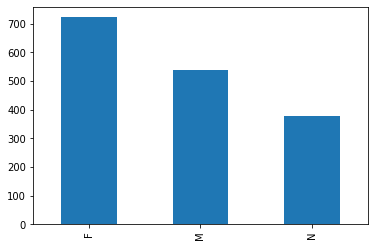

In [ ]:
#Perbandingan gender dalam barplot dimana terdpat kesalahan pada record data yaitu N.
cust_profile['gender'].value_counts().plot(kind='bar')

Awalnya saya berfikir bahwa N merupakan missvalue untuk M, namun karena data ini diambil di Amerika Serikat, maka saya berfikir bahwa N = Non Binary yang memang sudah berlaku di berbagai negara besar di eropa dan amerika

In [ ]:
cust_profile['generation'].value_counts()

Gen X                  398
Baby Boomers           393
Older Millennials      370
Gen Z                  255
Younger Millennials    224
Name: generation, dtype: int64

Tidak ada data yg inkonsisten pada generation

**Cek Duplikasi**





In [ ]:
cust_profile.duplicated().value_counts()

False    1640
dtype: int64

Melalui pengecekan dengan menggunakan value counts artinya tidak terdapat adanya data duplikasi

**Handling Outliers**

Handling Outliers bisa dilakukan dengan menggunakan boxplot, kali ini variabel yang akan di tinjau adalah umur karena merupakan variabel numerik.

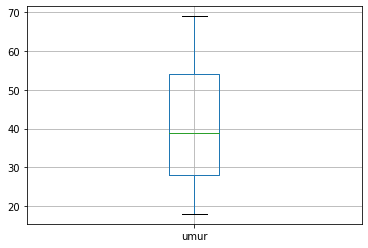

In [ ]:
cust_profile.boxplot(column=['umur'])

Berdasarkan visualisasi boxplot kita, maka terlihat bahwa tidak terdapat outliiers

Cek tipe Data 

In [ ]:
cust_profile.dtypes

customer_id               int64
customer_first-name      object
gender                   object
birth_year                int64
max(transaction_date)    object
tahun_beli               object
umur                      int64
generation               object
dtype: object

Dari tipe data diatas maka saya ingin mengganti data customer_id menjadi string. 

In [ ]:
cust_profile['customer_id'] = cust_profile['customer_id'].astype(str)

In [ ]:
cust_profile.dtypes

customer_id              object
customer_first-name      object
gender                   object
birth_year                int64
max(transaction_date)    object
tahun_beli               object
umur                      int64
generation               object
dtype: object

Tipe data sudah diganti

##Data Cleaning Data Transaction Data Frame

**Handling Missing Value**

In [ ]:
data_trx.isnull().sum()

customer_id         25042
transaction_date        0
store_city              0
product_group           0
product_category        0
product_type            0
product                 0
quantity                0
unit_price              0
instore_yn              0
promo_item_yn           0
new_product_yn          0
gender              25042
generation          25042
birth_year          25042
tahun_beli              0
umur                25042
penjualan($)            0
dtype: int64

In [ ]:
percent_missing = data_trx.isnull().sum() * 100 / len(data_trx)

In [ ]:
percent_missing

customer_id         50.190404
transaction_date     0.000000
store_city           0.000000
product_group        0.000000
product_category     0.000000
product_type         0.000000
product              0.000000
quantity             0.000000
unit_price           0.000000
instore_yn           0.000000
promo_item_yn        0.000000
new_product_yn       0.000000
gender              50.190404
generation          50.190404
birth_year          50.190404
tahun_beli           0.000000
umur                50.190404
penjualan($)         0.000000
dtype: float64

Jika diperhatikan terdapat missing value sekitar 50 persen pada customer_id, gender dan birth year. Ya data data ini adalah data pribadi atau private, dalam artian customer memutuskan untuk tidak membagi data pribadinya. Tentunya hal ini akan mempengaruhi analisis kita. Menggunakan data yang ambigu sebesar 50 persen justru akan berpotensi menimbulkan bias dan anomali pada analisis kita, sehingga kita tidak bisa membuat keputusan dan kebijakan dengan pasti. Oleh sebab itu daripada sibuk dengan ketidakpastian, maka saya akan memutuskan drop missing value. Selain karena berpotensi menimbulkan bias, tentunya dengan drop data-data ini, analisis kita akan valid dengan dataframe customer profiling yang sudah kita buat. 

In [ ]:
#drop missing value
data_trx = data_trx.dropna(axis=0, how='any')

In [ ]:
#hitung kembali missing value
data_trx.isnull().sum()

customer_id         0
transaction_date    0
store_city          0
product_group       0
product_category    0
product_type        0
product             0
quantity            0
unit_price          0
instore_yn          0
promo_item_yn       0
new_product_yn      0
gender              0
generation          0
birth_year          0
tahun_beli          0
umur                0
penjualan($)        0
dtype: int64

Setelah di drop maka kita pastikan bahwa tidak terdapat lagi missing value pada dataset yang kita miliki.

**Cek Data Konsistensi**

In [ ]:
data_trx['product_category'].unique()

array(['Tea', 'Coffee', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Coffee beans', 'Loose Tea', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [ ]:
data_trx['product_group'].unique()

array(['Beverages', 'Food', 'Add-ons', 'Whole Bean/Teas', 'Merchandise'],
      dtype=object)

In [ ]:
data_trx['product_type'].unique()

array(['Brewed Chai tea', 'Organic brewed coffee', 'Brewed Green tea',
       'Drip coffee', 'Premium brewed coffee', 'Gourmet brewed coffee',
       'Brewed Black tea', 'Hot chocolate', 'Barista Espresso', 'Scone',
       'Brewed herbal tea', 'Biscotti', 'Pastry', 'Regular syrup',
       'Organic Beans', 'Herbal tea', 'Sugar free syrup',
       'House blend Beans', 'Black tea', 'Premium Beans', 'Chai tea',
       'Drinking Chocolate', 'Green beans', 'Espresso Beans',
       'Gourmet Beans', 'Housewares', 'Green tea', 'Organic Chocolate',
       'Clothing'], dtype=object)

In [ ]:
data_trx['instore_yn'].unique()

array(['N', 'Y', ' '], dtype=object)

In [ ]:
data_trx['instore_yn'].value_counts()

Y    12445
N    12364
        43
Name: instore_yn, dtype: int64

In [ ]:
data_trx['instore_yn'].value_counts()[' ']*100/ len(data_trx)

0.17302430387896348

Setelah melakukan pengecekan ternyata terdapat data yang miss imputasi, dimana ada 43 transaksi yang tidak kita tau bahwa item tersebut dibeli di toko atau tidak, karena hanya 43 record atau hanya 0,17% dari observasi maka saya memutuskan untuk drop data tersebut untuk menghindari bias.

In [ ]:
data_trx.drop(data_trx.index[data_trx['instore_yn'] == ' '], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_trx['instore_yn'].value_counts()

Y    12445
N    12364
Name: instore_yn, dtype: int64

Data berhasil dihapus

In [ ]:
data_trx['promo_item_yn'].value_counts()

N    24620
Y      189
Name: promo_item_yn, dtype: int64

In [ ]:
data_trx['new_product_yn'].value_counts()

N    24809
Name: new_product_yn, dtype: int64

**Cek duplikasi**

In [ ]:
data_trx.duplicated().value_counts()

False    24714
True        95
dtype: int64

Ketika melakukan value counts ternyata terdapat duplikasi sekarang kita cek menggunakan dataframe

In [ ]:
duplicate = data_trx[data_trx.duplicated()]

In [ ]:
duplicate

,customer_id,transaction_date,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,generation,birth_year,tahun_beli,umur,penjualan($)
157,393.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Chai tea,Morning Sunrise Chai Lg,1,4.00,N,N,N,F,Baby Boomers,1962.0,2019,57.0,4.00
1447,8418.0,2019-04-01,New York,Beverages,Tea,Brewed herbal tea,Peppermint Rg,2,2.50,Y,N,N,M,Younger Millennials,1990.0,2019,29.0,5.00
1525,8154.0,2019-04-01,New York,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,2,3.00,Y,N,N,N,Younger Millennials,1992.0,2019,27.0,6.00
1529,8061.0,2019-04-01,New York,Beverages,Coffee,Barista Espresso,Cappuccino,1,3.75,Y,N,N,M,Older Millennials,1984.0,2019,35.0,3.75
2124,655.0,2019-04-02,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,2.00,N,N,N,F,Gen Z,1995.0,2019,24.0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42658,5683.0,2019-04-25,New York,Beverages,Tea,Brewed herbal tea,Lemon Grass Rg,1,2.50,N,N,N,N,Older Millennials,1986.0,2019,33.0,2.50
44955,8306.0,2019-04-26,New York,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Lg,1,3.00,N,N,N,N,Gen Z,1998.0,2019,21.0,3.00
48059,8128.0,2019-04-28,New York,Food,Bakery,Scone,Cranberry Scone,1,3.25,Y,N,N,N,Younger Millennials,1993.0,2019,26.0,3.25
49426,5764.0,2019-04-29,New York,Food,Bakery,Scone,Scottish Cream Scone,1,4.50,N,N,N,M,Older Millennials,1986.0,2019,33.0,4.50


Terdapat 95 data duplicated, data duplicatednya bisa kita drop untuk mempermudah observasi.

In [ ]:
data_trx.drop_duplicates(keep=False, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data_trx.duplicated().value_counts()

False    24628
dtype: int64

Data yang duplicate sudah di hapus

**Cek Outliers pada dataset Transaksi.**




Pengecekan Outliers dilakukan pada variabel harga untuk mengetahui apakah ada harga yang menyebabkan bias atau anomali pada data.

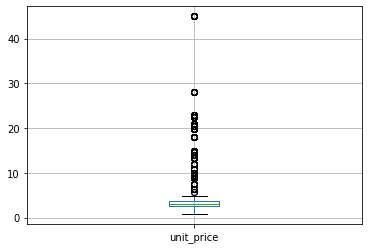

In [ ]:
data_trx.boxplot(column=['unit_price'])

In [ ]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(data_trx['unit_price'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [5.63, 5.63, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.

In [ ]:
outliers_percentage = len(sample_outliers)*100/len(data_trx)
outliers_percentage

2.119538736397596

Jika kita perhatikan terdapat 2 persen outliers pada data kita yang di representasikan oleh boxplot yang sudah kita buat, oleh sebab itu maka apabila kita melakukan drop pada outliers tidak akan terlalu mempengaruhi dataset kita

In [ ]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(data_trx['unit_price'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [5.63, 5.63, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 8.95, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.25, 9.

In [ ]:
data_trx = data_trx[~(data_trx['unit_price'].isin(sample_outliers))]

Metode drop yang saya gunakan adalah metode upper bound dan lower bound dimana upper bound merupakan outliers yang ada di atas dari nilai batas atasnya, dan lower bound untuk outliers yang ada di bawah dari batas bawahnya.

In [ ]:
data_trx

,customer_id,transaction_date,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,generation,birth_year,tahun_beli,umur,penjualan($)
0,558.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,N,N,N,F,Older Millennials,1983.0,2019,36.0,2.50
1,781.0,2019-04-01,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,N,N,N,N,Younger Millennials,1991.0,2019,28.0,7.00
2,788.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,Y,N,N,N,Gen Z,1995.0,2019,24.0,5.00
3,683.0,2019-04-01,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,N,N,N,F,Gen Z,1999.0,2019,20.0,5.00
4,99.0,2019-04-01,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,Y,N,N,M,Gen X,1967.0,2019,52.0,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49882,8026.0,2019-04-29,New York,Beverages,Coffee,Barista Espresso,Cappuccino Lg,1,4.25,Y,N,N,M,Baby Boomers,1962.0,2019,57.0,4.25
49888,8401.0,2019-04-29,New York,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,1,2.10,N,Y,N,M,Baby Boomers,1954.0,2019,65.0,2.10
49890,8412.0,2019-04-29,New York,Beverages,Coffee,Organic brewed coffee,Brazilian Sm,2,2.20,Y,N,N,M,Baby Boomers,1953.0,2019,66.0,4.40
49892,8030.0,2019-04-29,New York,Beverages,Tea,Brewed herbal tea,Peppermint Rg,2,2.50,N,N,N,F,Younger Millennials,1994.0,2019,25.0,5.00


In [ ]:
len(data_trx)

24106

Kita sudah berhasil melakukan drop outliers sebanyak 522 record


##Cek tipe data

In [ ]:
data_trx.dtypes

customer_id         float64
transaction_date     object
store_city           object
product_group        object
product_category     object
product_type         object
product              object
quantity              int64
unit_price          float64
instore_yn           object
promo_item_yn        object
new_product_yn       object
gender               object
generation           object
birth_year          float64
tahun_beli           object
umur                float64
penjualan($)        float64
dtype: object

Dari hasil diatas maka yang akan kita ubah data typenya adalah transaction date dan customer_id

In [ ]:
data_trx['transaction_date'] = pd.to_datetime(data_trx['transaction_date'])

In [ ]:
data_trx['customer_id'] = data_trx['customer_id'].astype(str)

In [ ]:
data_trx.dtypes

customer_id                 object
transaction_date    datetime64[ns]
store_city                  object
product_group               object
product_category            object
product_type                object
product                     object
quantity                     int64
unit_price                 float64
instore_yn                  object
promo_item_yn               object
new_product_yn              object
gender                      object
generation                  object
birth_year                 float64
tahun_beli                  object
umur                       float64
penjualan($)               float64
dtype: object

data types berhasil diubah

##Data Cleaning pada Data Inventory Data Frame

**Handling Missing Value**

In [ ]:
data_inv.isnull().sum()

transaction_date           0
store_city                 0
product                    0
product_type               0
product_category           0
product_group              0
current_wholesale_price    0
current_retail_price       0
start_of_day               0
quantity_sold              0
waste                      0
% waste                    0
dtype: int64

Berdasarkan hasil pengecekan yang kita lakukan bahwa tidak terdapat missing value pada dataframe data inventory.

**Cek Data Konsistensi**

Pada tahap ini kita ingin melakukan pengecekan pada data inventory

In [ ]:
data_inv

,transaction_date,store_city,product,product_type,product_category,product_group,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste
0,4/1/2019,Long Island City,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,$3.50,18,8,10,56%
1,4/1/2019,Long Island City,Cranberry Scone,Scone,Bakery,Food,2.11,$3.25,18,12,6,33%
2,4/1/2019,Long Island City,Chocolate Croissant,Pastry,Bakery,Food,2.44,$3.75,18,8,10,56%
3,4/1/2019,Long Island City,Ginger Scone,Scone,Bakery,Food,2.11,$3.25,48,9,39,81%
4,4/1/2019,Long Island City,Almond Croissant,Pastry,Bakery,Food,2.44,$3.75,18,9,9,50%
...,...,...,...,...,...,...,...,...,...,...,...,...
302,4/27/2019,New York,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,$3.50,18,1,17,94%
303,4/27/2019,New York,Cranberry Scone,Scone,Bakery,Food,2.11,$3.25,18,4,14,78%
304,4/27/2019,New York,Chocolate Croissant,Pastry,Bakery,Food,2.44,$3.75,18,2,16,89%
305,4/27/2019,New York,Ginger Scone,Scone,Bakery,Food,2.11,$3.25,48,19,29,60%


Pada tahap ini saya ingin menghapus logo dolar ($) yang ada pada kolom current retail price, supaya datanya konsisten dengan current wholesale price

In [ ]:
data_inv.current_retail_price = [x.strip('$') for x in data_inv.current_retail_price]

In [ ]:
data_inv

,transaction_date,store_city,product,product_type,product_category,product_group,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste
0,4/1/2019,Long Island City,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,8,10,56%
1,4/1/2019,Long Island City,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,12,6,33%
2,4/1/2019,Long Island City,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,8,10,56%
3,4/1/2019,Long Island City,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,9,39,81%
4,4/1/2019,Long Island City,Almond Croissant,Pastry,Bakery,Food,2.44,3.75,18,9,9,50%
...,...,...,...,...,...,...,...,...,...,...,...,...
302,4/27/2019,New York,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,1,17,94%
303,4/27/2019,New York,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,4,14,78%
304,4/27/2019,New York,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,2,16,89%
305,4/27/2019,New York,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,19,29,60%


Berdasarkan hasil diatas maka data kita sudah konsisten untuk tanda dollar nya. 

#Cek duplikasi

In [ ]:
duplicate = data_inv[data_inv.duplicated()]
len(duplicate)

5

Berdasarkan hasil diatas bahwa terdapat 5 data duplikat pada data_inventory, maka akan kita drop

In [ ]:
data_inv.drop_duplicates(keep=False, inplace=True)

In [ ]:
data_inv

,transaction_date,store_city,product,product_type,product_category,product_group,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste
0,4/1/2019,Long Island City,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,8,10,56%
1,4/1/2019,Long Island City,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,12,6,33%
2,4/1/2019,Long Island City,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,8,10,56%
3,4/1/2019,Long Island City,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,9,39,81%
4,4/1/2019,Long Island City,Almond Croissant,Pastry,Bakery,Food,2.44,3.75,18,9,9,50%
...,...,...,...,...,...,...,...,...,...,...,...,...
302,4/27/2019,New York,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,1,17,94%
303,4/27/2019,New York,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,4,14,78%
304,4/27/2019,New York,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,2,16,89%
305,4/27/2019,New York,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,19,29,60%


In [ ]:
duplicate = data_inv[data_inv.duplicated()]
len(duplicate)

0

Duplicate berhasil dihapus

###Cek tipe data

In [ ]:
data_inv.dtypes

transaction_date            object
store_city                  object
product                     object
product_type                object
product_category            object
product_group               object
current_wholesale_price    float64
current_retail_price        object
start_of_day                 int64
quantity_sold                int64
waste                        int64
% waste                     object
dtype: object

Kita akan mengubah transaction date dan currert retail price

In [ ]:
data_inv['transaction_date'] = pd.to_datetime(data_inv['transaction_date'])

In [ ]:
data_inv['current_retail_price'] = data_inv['current_retail_price'].astype(float)

In [ ]:
data_inv.dtypes

transaction_date           datetime64[ns]
store_city                         object
product                            object
product_type                       object
product_category                   object
product_group                      object
current_wholesale_price           float64
current_retail_price              float64
start_of_day                        int64
quantity_sold                       int64
waste                               int64
% waste                            object
dtype: object

###Handling Outlier

Disini saya akan menggunakan Handling Outlier Multivariate pada kolom current whole sale price , dan current retail price.

In [ ]:
df = data_inv[['current_wholesale_price', 'current_retail_price']]
df = df.to_numpy()

In [ ]:
df

array([[2.28, 3.5 ],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.28, 3.5 ],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.28, 3.5 ],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.28, 3.5 ],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.28, 3.5 ],
       [2.28, 3.5 ],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.28, 3.5 ],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.28, 3.5 ],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.28, 3.5 ],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.11, 3.25],
       [2.28, 3.5 ],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.11, 3.25],
       [2.44, 3.75],
       [2.28, 3.5 ],
       [2.11, 3.25],
       [2.44,

In [ ]:
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [ ]:
from scipy.stats import chi2

In [ ]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier 
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([], dtype=int64),)
--- Observasi terdeteksi sebagai outlier -----
[]


Berdasarkan observasi yang dilakukan bahwa pada dataset numerik yg kita miliki tidak terdapat outliers.

# Cek Data Konsistensi pada dataset inventory


In [ ]:
data_trx['product'].value_counts()

Morning Sunrise Chai Rg         520
Sustainably Grown Organic Lg    516
Brazilian Sm                    515
Columbian Medium Roast Rg       515
Our Old Time Diner Blend Sm     511
Traditional Blend Chai Rg       510
Latte                           510
Spicy Eye Opener Chai Lg        507
English Breakfast Lg            503
Dark chocolate Lg               502
Serenity Green Tea Rg           502
Our Old Time Diner Blend Rg     500
Lemon Grass Rg                  500
Earl Grey Rg                    500
Brazilian Rg                    494
English Breakfast Rg            493
Serenity Green Tea Lg           488
Ethiopia Lg                     487
Sustainably Grown Organic Rg    487
Morning Sunrise Chai Lg         486
Ethiopia Rg                     479
Peppermint Rg                   479
Spicy Eye Opener Chai Rg        475
Brazilian Lg                    470
Latte Rg                        469
Jamaican Coffee River Rg        468
Jamaican Coffee River Sm        466
Traditional Blend Chai Lg   

Disini kita akan memperbaiki data typo pada Carmel menjadi Caramel.

In [ ]:
data_trx.replace('Carmel syrup', 'Caramel syrup')

,customer_id,transaction_date,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,generation,birth_year,tahun_beli,umur,penjualan($)
0,558.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,N,N,N,F,Older Millennials,1983.0,2019,36.0,2.50
1,781.0,2019-04-01,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,N,N,N,N,Younger Millennials,1991.0,2019,28.0,7.00
2,788.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,Y,N,N,N,Gen Z,1995.0,2019,24.0,5.00
3,683.0,2019-04-01,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,N,N,N,F,Gen Z,1999.0,2019,20.0,5.00
4,99.0,2019-04-01,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,Y,N,N,M,Gen X,1967.0,2019,52.0,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49882,8026.0,2019-04-29,New York,Beverages,Coffee,Barista Espresso,Cappuccino Lg,1,4.25,Y,N,N,M,Baby Boomers,1962.0,2019,57.0,4.25
49888,8401.0,2019-04-29,New York,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,1,2.10,N,Y,N,M,Baby Boomers,1954.0,2019,65.0,2.10
49890,8412.0,2019-04-29,New York,Beverages,Coffee,Organic brewed coffee,Brazilian Sm,2,2.20,Y,N,N,M,Baby Boomers,1953.0,2019,66.0,4.40
49892,8030.0,2019-04-29,New York,Beverages,Tea,Brewed herbal tea,Peppermint Rg,2,2.50,N,N,N,F,Younger Millennials,1994.0,2019,25.0,5.00


In [ ]:
data_trx['product'].value_counts()

Morning Sunrise Chai Rg         520
Sustainably Grown Organic Lg    516
Brazilian Sm                    515
Columbian Medium Roast Rg       515
Our Old Time Diner Blend Sm     511
Traditional Blend Chai Rg       510
Latte                           510
Spicy Eye Opener Chai Lg        507
English Breakfast Lg            503
Dark chocolate Lg               502
Serenity Green Tea Rg           502
Our Old Time Diner Blend Rg     500
Lemon Grass Rg                  500
Earl Grey Rg                    500
Brazilian Rg                    494
English Breakfast Rg            493
Serenity Green Tea Lg           488
Ethiopia Lg                     487
Sustainably Grown Organic Rg    487
Morning Sunrise Chai Lg         486
Ethiopia Rg                     479
Peppermint Rg                   479
Spicy Eye Opener Chai Rg        475
Brazilian Lg                    470
Latte Rg                        469
Jamaican Coffee River Rg        468
Jamaican Coffee River Sm        466
Traditional Blend Chai Lg   

In [ ]:
data_trx['product'] = data_trx['product'].str.replace('Carmel syrup','Caramel syrup')

In [ ]:
data_trx['product'].unique()

array(['Traditional Blend Chai Rg', 'Brazilian Lg',
       'Serenity Green Tea Rg', 'Our Old Time Diner Blend Rg',
       'Jamaican Coffee River Sm', 'Ethiopia Rg', 'English Breakfast Lg',
       'Sustainably Grown Organic Rg', 'Earl Grey Lg',
       'Jamaican Coffee River Rg', 'Serenity Green Tea Lg',
       'Brazilian Sm', 'English Breakfast Rg',
       'Traditional Blend Chai Lg', 'Cappuccino', 'Espresso shot',
       'Cappuccino Lg', 'Latte', 'Earl Grey Rg', 'Dark chocolate Lg',
       'Columbian Medium Roast Sm', 'Oatmeal Scone',
       'Morning Sunrise Chai Lg', 'Morning Sunrise Chai Rg',
       'Peppermint Lg', 'Jumbo Savory Scone', 'Lemon Grass Lg',
       'Sustainably Grown Organic Lg', 'Dark chocolate Rg',
       'Lemon Grass Rg', 'Ethiopia Sm', 'Latte Rg',
       'Our Old Time Diner Blend Sm', 'Chocolate Chip Biscotti',
       'Columbian Medium Roast Rg', 'Ethiopia Lg', 'Brazilian Rg',
       'Columbian Medium Roast Lg', 'Spicy Eye Opener Chai Rg',
       'Ginger Biscotti', 

Penulisan yang typo sudah di perbaiki

In [ ]:
data_trx['store_city'].value_counts()

New York            15734
Long Island City     8372
Name: store_city, dtype: int64

Tidak terdapat miss penulisan pada kolom store city

#EDA


# 1.CUSTOMER PROFILE ANALYSIS 

## Mengetahui Persebaran Data Usia Customer


In [ ]:
cust_profile.head()

,customer_id,customer_first-name,gender,birth_year,max(transaction_date),tahun_beli,umur,generation
0,5503,Aaron,N,1987,2019-04-23,2019,32,Older Millennials
1,5902,Abbot,M,1996,2019-04-29,2019,23,Gen Z
2,244,Abbot Charles,M,1991,2019-04-11,2019,28,Younger Millennials
3,768,Abel Hood,N,1984,2019-04-29,2019,35,Older Millennials
4,5518,Abra,F,1952,2019-04-28,2019,67,Baby Boomers


In [ ]:
cust_profile['umur'].describe()

count    1640.000000
mean       40.972561
std        14.794252
min        18.000000
25%        28.000000
50%        39.000000
75%        54.000000
max        69.000000
Name: umur, dtype: float64

Berdasarkan persebaran statistik diatas maka dapat kita simpulkan bahwa rata rata usia customer adalah 40.972561 tahun dengan minimal usia adalah 18 dan maksimal 69

##Mengetahui Persebaran Generasi Customer

In [ ]:
data_gen = cust_profile.groupby(['generation'])['customer_id'].count().reset_index(name = 'total')

In [ ]:
data_gen

,generation,total
0,Baby Boomers,393
1,Gen X,398
2,Gen Z,255
3,Older Millennials,370
4,Younger Millennials,224


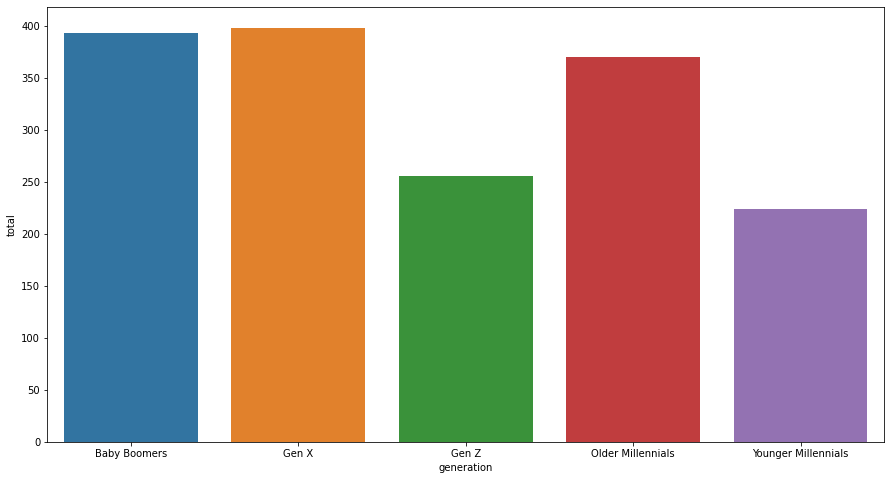

In [ ]:
plt.figure(figsize=(15,8))
viz = sns.barplot(data=data_gen, x='generation', y = 'total')
plt.show()

Note : Perhatikan bahwa data customer yang kita gunakan adalah customer yang sudah memiliki Customer ID, karena akan lebih relevan untuk analisis kedepannya.

Dari data diatas dapat kita simpulkan bahwa mayoritas dari customer adalah Gen X dan hanya beda tipis dengan generasi Baby Boomers

## Mengetahui Persebaran Data Jenis Kelamin Customer


In [ ]:
data_gender = cust_profile.groupby(['gender'])['customer_id'].count().reset_index(name = 'total')

In [ ]:
data_gender

,gender,total
0,F,723
1,M,539
2,N,378


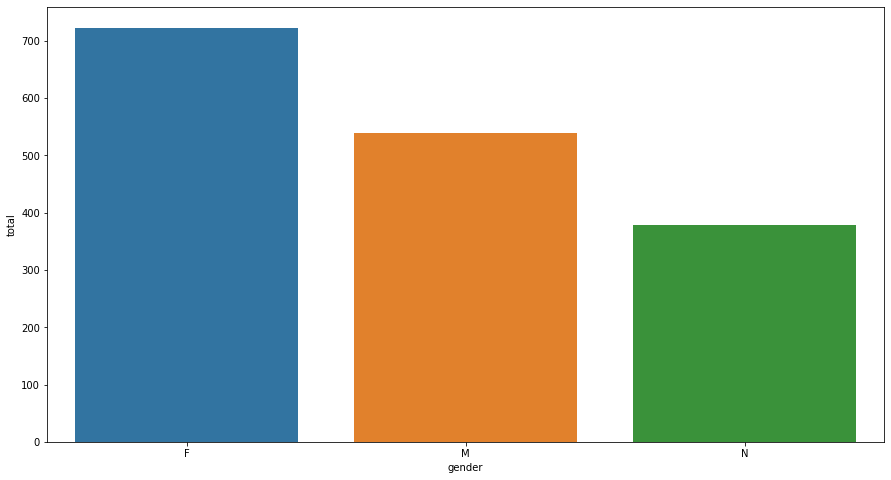

In [ ]:
plt.figure(figsize=(15,8))
viz = sns.barplot(data=data_gender, x='gender', y = 'total')
plt.show()

Berdasarkan hasil analisa kita bahwa Jenis Kelamin yang paling banyak adalah Jenis Kelamin Perempuan 

## Mengetahui Persebaran Data Customer yang membeli kopi berdasarkan Generasinya


In [ ]:
cust_profile.head()

,customer_id,customer_first-name,gender,birth_year,max(transaction_date),tahun_beli,umur,generation
0,5503,Aaron,N,1987,2019-04-23,2019,32,Older Millennials
1,5902,Abbot,M,1996,2019-04-29,2019,23,Gen Z
2,244,Abbot Charles,M,1991,2019-04-11,2019,28,Younger Millennials
3,768,Abel Hood,N,1984,2019-04-29,2019,35,Older Millennials
4,5518,Abra,F,1952,2019-04-28,2019,67,Baby Boomers


In [ ]:
data_trx.head()

,customer_id,transaction_date,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,generation,birth_year,tahun_beli,umur,penjualan($)
0,558.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,N,N,N,F,Older Millennials,1983.0,2019,36.0,2.50
1,781.0,2019-04-01,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,N,N,N,N,Younger Millennials,1991.0,2019,28.0,7.00
2,788.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,Y,N,N,N,Gen Z,1995.0,2019,24.0,5.00
3,683.0,2019-04-01,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,N,N,N,F,Gen Z,1999.0,2019,20.0,5.00
4,99.0,2019-04-01,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,Y,N,N,M,Gen X,1967.0,2019,52.0,2.45


In [ ]:
data_trx.dtypes

customer_id                 object
transaction_date    datetime64[ns]
store_city                  object
product_group               object
product_category            object
product_type                object
product                     object
quantity                     int64
unit_price                 float64
instore_yn                  object
promo_item_yn               object
new_product_yn              object
gender                      object
generation                  object
birth_year                 float64
tahun_beli                  object
umur                       float64
penjualan($)               float64
dtype: object

In [ ]:
data_gen = data_trx.groupby('generation')['product_category'].apply(lambda x: (x=='Coffe').count()).reset_index(name='count')

In [ ]:
data_gen

,generation,count
0,Baby Boomers,5824
1,Gen X,5537
2,Gen Z,4158
3,Older Millennials,5314
4,Younger Millennials,3273


Berdasarkan Hasil Analisis kita bahwa Generasi yang paling banyak memesan kopi adalah Generasi Baby Boomers.

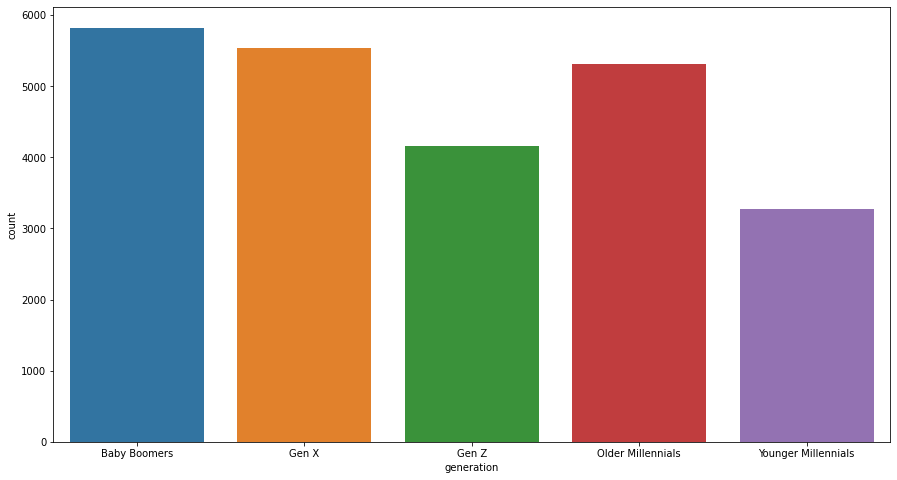

In [ ]:
plt.figure(figsize=(15,8))
viz = sns.barplot(data=data_gen, x='generation', y='count')
plt.show()

# 2.DATA TRANSAKSI ANALISIS

##mengetahui transaksi terbanyak berdasarkan waktunya

In [ ]:
trx_time= pd.DataFrame(data_trx.groupby('transaction_date')['customer_id'].count().reset_index(name = 'total transaksi'))

In [ ]:
trx_time

,transaction_date,total transaksi
0,2019-04-01,1649
1,2019-04-02,1636
2,2019-04-03,1673
3,2019-04-04,1582
4,2019-04-05,1628
5,2019-04-06,1454
6,2019-04-07,783
7,2019-04-08,816
8,2019-04-09,614
9,2019-04-10,949


Menampilkan total transaksi dalam bentuk time series

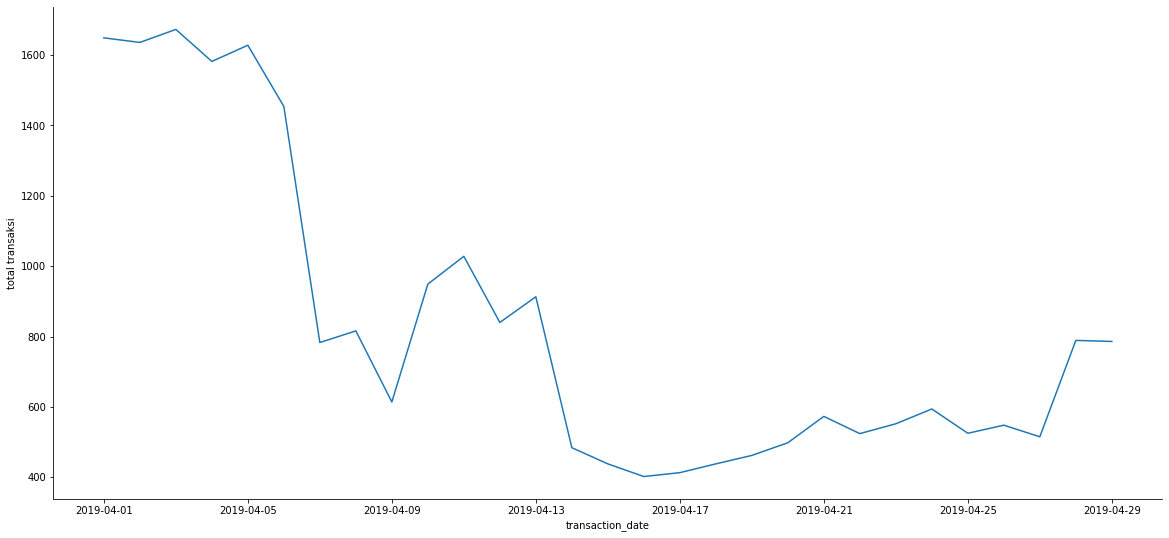

In [ ]:
a = sns.relplot(x="transaction_date", y="total transaksi", kind="line", data=trx_time)
a.fig.set_size_inches(20,8)

In [ ]:
trx_time.describe()

,total transaksi
count,29.000000
mean,831.241379
std,436.296152
min,402.000000
25%,515.000000
50%,614.000000
75%,949.000000
max,1673.000000


In [ ]:
tertinggi = max(trx_time['total transaksi'])

In [ ]:
max_trx = trx_time[trx_time['total transaksi'] == tertinggi] 

In [ ]:
max_trx

,transaction_date,total transaksi
2,2019-04-03,1673


Transaksi tertinggi adalah pada tanggal 2019 04 03 dengan total transaksi 1673

##  mengetahui jumlah promo terhadap total transaksi 

In [ ]:
data_trx.head()

,customer_id,transaction_date,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,generation,birth_year,tahun_beli,umur,penjualan($)
0,558.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,N,N,N,F,Older Millennials,1983.0,2019,36.0,2.50
1,781.0,2019-04-01,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,N,N,N,N,Younger Millennials,1991.0,2019,28.0,7.00
2,788.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,Y,N,N,N,Gen Z,1995.0,2019,24.0,5.00
3,683.0,2019-04-01,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,N,N,N,F,Gen Z,1999.0,2019,20.0,5.00
4,99.0,2019-04-01,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,Y,N,N,M,Gen X,1967.0,2019,52.0,2.45


In [ ]:
promo = data_trx.groupby('promo_item_yn')['penjualan($)'].sum().reset_index(name = 'total transaksi')

In [ ]:
promo

,promo_item_yn,total transaksi
0,N,104651.51
1,Y,644.25


In [ ]:
promo = promo.replace({'N': 0, 'Y':1})

In [ ]:
promo

,promo_item_yn,total transaksi
0,0,23925
1,1,181


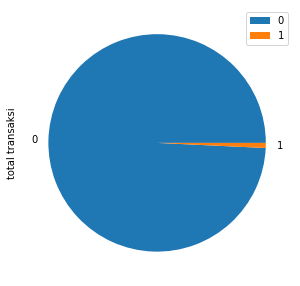

In [ ]:
plot = promo.plot.pie(y='total transaksi', figsize=(18, 5))

Dari hasil analisis diatas maka dapat disimpulkan bahwa penjulan kita tidak dipengaruhi oleh promo yang sedang berlaku, produk produk yang tidak promo juga lebih laku dibanding yang promo

In [ ]:
trx_promo = pd.crosstab(data_trx['transaction_date'],data_trx['promo_item_yn'],data_trx['customer_id'],aggfunc='count', dropna=True)


In [ ]:
trx_promo

promo_item_yn,N,Y
transaction_date,,
2019-04-01,1649.0,NaN
2019-04-02,1636.0,NaN
2019-04-03,1673.0,NaN
2019-04-04,1582.0,NaN
2019-04-05,1628.0,NaN
2019-04-06,1454.0,NaN
2019-04-07,783.0,NaN
2019-04-08,816.0,NaN
2019-04-09,614.0,NaN


In [ ]:
trx_promo = trx_promo.dropna()

In [ ]:
trx_promo

promo_item_yn,N,Y
transaction_date,,
2019-04-15,430.0,8.0
2019-04-16,394.0,8.0
2019-04-17,411.0,2.0
2019-04-18,432.0,6.0
2019-04-19,452.0,10.0
2019-04-20,490.0,8.0
2019-04-21,563.0,10.0
2019-04-22,512.0,12.0
2019-04-23,538.0,14.0


In [ ]:
data_trx

,customer_id,transaction_date,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,generation,birth_year,tahun_beli,umur,penjualan($)
0,558.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,N,N,N,F,Older Millennials,1983.0,2019,36.0,2.50
1,781.0,2019-04-01,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,N,N,N,N,Younger Millennials,1991.0,2019,28.0,7.00
2,788.0,2019-04-01,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,Y,N,N,N,Gen Z,1995.0,2019,24.0,5.00
3,683.0,2019-04-01,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,N,N,N,F,Gen Z,1999.0,2019,20.0,5.00
4,99.0,2019-04-01,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,Y,N,N,M,Gen X,1967.0,2019,52.0,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49882,8026.0,2019-04-29,New York,Beverages,Coffee,Barista Espresso,Cappuccino Lg,1,4.25,Y,N,N,M,Baby Boomers,1962.0,2019,57.0,4.25
49888,8401.0,2019-04-29,New York,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,1,2.10,N,Y,N,M,Baby Boomers,1954.0,2019,65.0,2.10
49890,8412.0,2019-04-29,New York,Beverages,Coffee,Organic brewed coffee,Brazilian Sm,2,2.20,Y,N,N,M,Baby Boomers,1953.0,2019,66.0,4.40
49892,8030.0,2019-04-29,New York,Beverages,Tea,Brewed herbal tea,Peppermint Rg,2,2.50,N,N,N,F,Younger Millennials,1994.0,2019,25.0,5.00


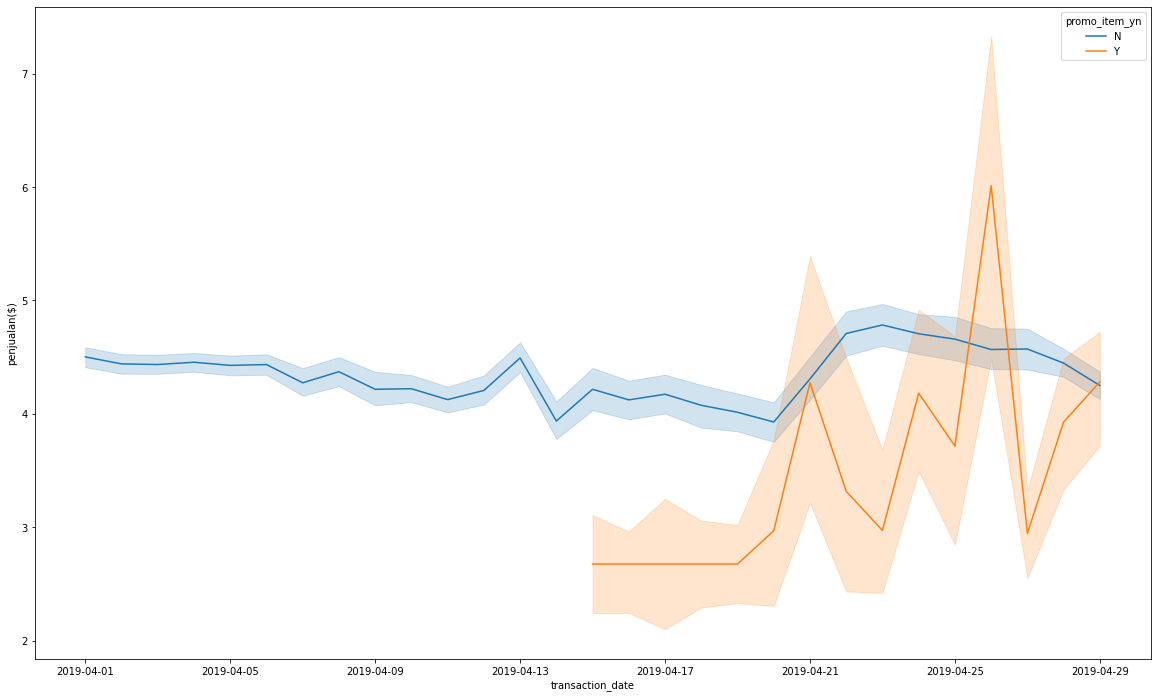

In [ ]:
plt.figure(figsize = (20,12)) 
sns.lineplot(x = "transaction_date", y = "penjualan($)", data = data_trx, hue = "promo_item_yn")
plt.show()

Gambar diatas menunjukkan bahwa penjualan dengan promo terbanyak adalah pada tanggal 2019-04-27

## mengetahui apakah customer lebih suka beli di toko atau tidak

In [ ]:
instore = pd.DataFrame(data_trx.groupby('instore_yn')['customer_id'].count().reset_index(name = 'total customer'))

In [ ]:
instore

,instore_yn,total customer
0,N,11988
1,Y,12118


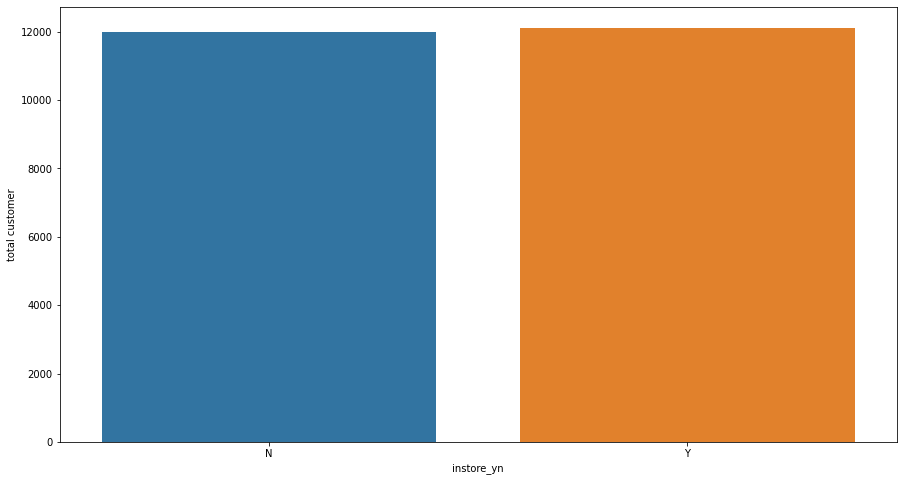

In [ ]:
plt.figure(figsize=(15,8))
viz = sns.barplot(data=instore, x='instore_yn', y='total customer')
plt.show()

Dari Proporsi grafik bahwa antara   

##mengetahui total transaksi berdasarkan lokasi toko

In [ ]:
trx_city = pd.DataFrame(data_trx.groupby(["store_city"])['customer_id'].count().reset_index(name = 'total customer'))

In [ ]:
trx_city

,store_city,total customer
0,Long Island City,8372
1,New York,15734


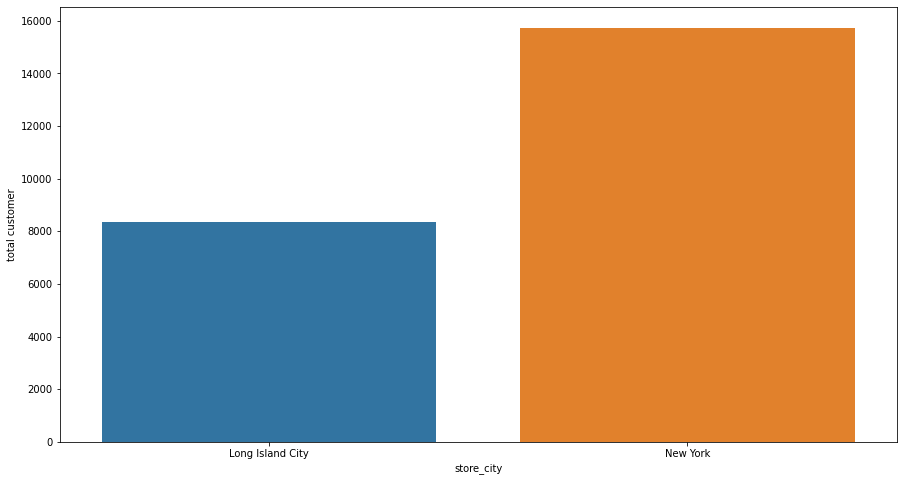

In [ ]:
plt.figure(figsize=(15,8))
viz = sns.barplot(data=trx_city, x='store_city', y='total customer')
plt.show()

Grafik diatas menunjukkan bahwa transaksi terbanyak ada di newyork

# 3.DATA INVENTORY ANALISIS

In [ ]:
data_inv

,transaction_date,store_city,product,product_type,product_category,product_group,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste
0,2019-04-01,Long Island City,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,8,10,56%
1,2019-04-01,Long Island City,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,12,6,33%
2,2019-04-01,Long Island City,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,8,10,56%
3,2019-04-01,Long Island City,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,9,39,81%
4,2019-04-01,Long Island City,Almond Croissant,Pastry,Bakery,Food,2.44,3.75,18,9,9,50%
...,...,...,...,...,...,...,...,...,...,...,...,...
302,2019-04-27,New York,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,1,17,94%
303,2019-04-27,New York,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,4,14,78%
304,2019-04-27,New York,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,2,16,89%
305,2019-04-27,New York,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,19,29,60%


In [ ]:
data_inv.rename( {'% waste':'waste_percentage'}, axis = 1, inplace = True)

In [ ]:
data_inv

,transaction_date,store_city,product,product_type,product_category,product_group,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,waste_percentage
0,2019-04-01,Long Island City,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,8,10,56%
1,2019-04-01,Long Island City,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,12,6,33%
2,2019-04-01,Long Island City,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,8,10,56%
3,2019-04-01,Long Island City,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,9,39,81%
4,2019-04-01,Long Island City,Almond Croissant,Pastry,Bakery,Food,2.44,3.75,18,9,9,50%
...,...,...,...,...,...,...,...,...,...,...,...,...
302,2019-04-27,New York,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,1,17,94%
303,2019-04-27,New York,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,4,14,78%
304,2019-04-27,New York,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,2,16,89%
305,2019-04-27,New York,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,19,29,60%


In [ ]:
data_inv.waste_percentage = [x.strip('%') for x in data_inv.waste_percentage]

Pada tahap ini saya akan mengubah waste percentage menjadi float agar dapat digunakan dalam operasi perhitungan

In [ ]:
data_inv

,transaction_date,store_city,product,product_type,product_category,product_group,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,waste_percentage
0,2019-04-01,Long Island City,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,8,10,56
1,2019-04-01,Long Island City,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,12,6,33
2,2019-04-01,Long Island City,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,8,10,56
3,2019-04-01,Long Island City,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,9,39,81
4,2019-04-01,Long Island City,Almond Croissant,Pastry,Bakery,Food,2.44,3.75,18,9,9,50
...,...,...,...,...,...,...,...,...,...,...,...,...
302,2019-04-27,New York,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,1,17,94
303,2019-04-27,New York,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,4,14,78
304,2019-04-27,New York,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,2,16,89
305,2019-04-27,New York,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,19,29,60


In [ ]:
data_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 306
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_date         297 non-null    datetime64[ns]
 1   store_city               297 non-null    object        
 2   product                  297 non-null    object        
 3   product_type             297 non-null    object        
 4   product_category         297 non-null    object        
 5   product_group            297 non-null    object        
 6   current_wholesale_price  297 non-null    float64       
 7   current_retail_price     297 non-null    float64       
 8   start_of_day             297 non-null    int64         
 9   quantity_sold            297 non-null    int64         
 10  waste                    297 non-null    int64         
 11  waste_percentage         297 non-null    object        
dtypes: datetime64[ns](1), float64(2), in

mengetahui rata rata produk yang terbuang 

In [ ]:
inventory_waste = pd.DataFrame(data_inv.groupby(by= ['transaction_date'])['waste'].sum()).reset_index()

In [ ]:
data_inv

,transaction_date,store_city,product,product_type,product_category,product_group,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,waste_percentage
0,2019-04-01,Long Island City,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,8,10,56
1,2019-04-01,Long Island City,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,12,6,33
2,2019-04-01,Long Island City,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,8,10,56
3,2019-04-01,Long Island City,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,9,39,81
4,2019-04-01,Long Island City,Almond Croissant,Pastry,Bakery,Food,2.44,3.75,18,9,9,50
...,...,...,...,...,...,...,...,...,...,...,...,...
302,2019-04-27,New York,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,1,17,94
303,2019-04-27,New York,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,4,14,78
304,2019-04-27,New York,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,2,16,89
305,2019-04-27,New York,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,19,29,60


In [ ]:
data_inv['waste_percentage'] = data_inv['waste_percentage'].astype(float)

In [ ]:
inventory_waste

,transaction_date,waste
0,2019-04-01,74
1,2019-04-02,74
2,2019-04-03,79
3,2019-04-04,72
4,2019-04-05,0
5,2019-04-06,50
6,2019-04-07,256
7,2019-04-08,242
8,2019-04-09,229
9,2019-04-10,250


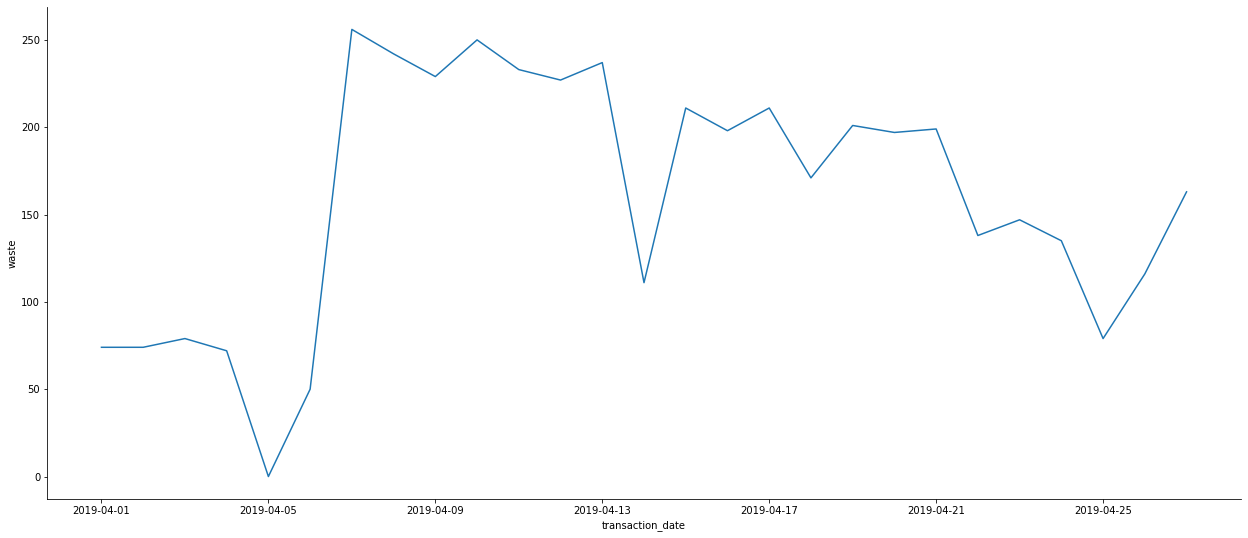

In [ ]:
a = sns.relplot(x="transaction_date", y="waste", kind="line", data=inventory_waste)
a.fig.set_size_inches(20,8)

Berikut merupakan tampilan untuk tampilan time series dari banyaknya inventory yang terbuang dalam bentuk time series tertinggi adalah pada tanggal 2019-04-07 dengan rata rata produk yg terbuang adalah 256

In [ ]:
product_waste = pd.DataFrame(data_inv.groupby(by= ['product'], dropna=False)['waste'].sum()).reset_index()

In [ ]:
product_waste

,product,waste
0,Almond Croissant,600
1,Chocolate Croissant,557
2,Cranberry Scone,556
3,Ginger Scone,2002
4,Hazelnut Biscotti,585


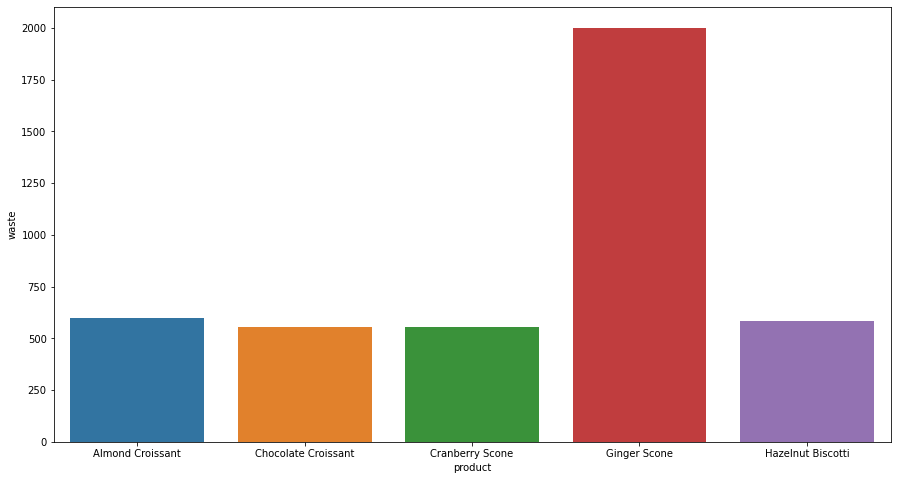

In [ ]:
plt.figure(figsize=(15,8))
viz = sns.barplot(data=product_waste,  x='product', y='waste')
plt.show()

Terlihat dari grafik bahwa produk yang paling banyak terbuang adalah Ginger Stone

In [ ]:
data_inv

,transaction_date,store_city,product,product_type,product_category,product_group,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,waste_percentage
0,2019-04-01,Long Island City,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,8,10,56.0
1,2019-04-01,Long Island City,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,12,6,33.0
2,2019-04-01,Long Island City,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,8,10,56.0
3,2019-04-01,Long Island City,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,9,39,81.0
4,2019-04-01,Long Island City,Almond Croissant,Pastry,Bakery,Food,2.44,3.75,18,9,9,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
302,2019-04-27,New York,Hazelnut Biscotti,Biscotti,Bakery,Food,2.28,3.50,18,1,17,94.0
303,2019-04-27,New York,Cranberry Scone,Scone,Bakery,Food,2.11,3.25,18,4,14,78.0
304,2019-04-27,New York,Chocolate Croissant,Pastry,Bakery,Food,2.44,3.75,18,2,16,89.0
305,2019-04-27,New York,Ginger Scone,Scone,Bakery,Food,2.11,3.25,48,19,29,60.0


In [ ]:
product_type_waste = pd.DataFrame(data_inv.groupby(by= ['product_type'], dropna=True)['waste'].sum()).reset_index()

In [ ]:
product_type_waste

,product_type,waste
0,Biscotti,585
1,Pastry,1157
2,Scone,2558


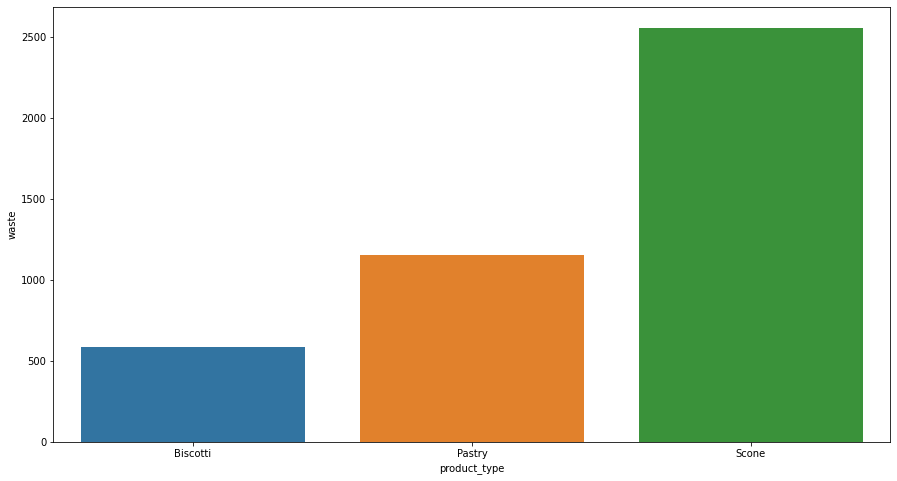

In [ ]:
plt.figure(figsize=(15,8))
viz = sns.barplot(data=product_type_waste,  x='product_type', y='waste')
plt.show()

In [ ]:
product_category_waste = pd.DataFrame(data_inv.groupby(by= ['product_category'], dropna=True)['waste'].sum()).reset_index()

In [ ]:
product_analysis = pd.DataFrame(data_inv.groupby(by= ['product_group', 'product_category', 'product_type', 'product'], dropna=False)['waste'].sum())

In [ ]:
product_analysis

waste
product_group product_category product_type product                   
Food          Bakery           Biscotti     Hazelnut Biscotti      585
                               Pastry       Almond Croissant       600
                                            Chocolate Croissant    557
                               Scone        Cranberry Scone        556
                                            Ginger Scone          2002

In [ ]:
product_category_waste

,product_category,waste
0,Bakery,4300


In [ ]:
product_group_waste = pd.DataFrame(data_inv.groupby(by= ['product_group'], dropna=True)['waste'].sum()).reset_index()

In [ ]:
product_group_waste

,product_group,waste
0,Food,4300


Berdasarkan hasil analisis kita bahwa inventory yang terbuang atau waste adalah pada jenis makanan saja , dengan kategory roti rotian. Dari ketiga jenis product type jenis Scone merupakan paling tidak laku terutama pada varian Ginger Scone

In [ ]:
data_inv.to_csv('inventory.csv')

In [ ]:
cust_profile.to_csv('profiling.csv')

In [ ]:
data_trx.to_csv('transaction.csv')